In [ ]:
# 如果在google colab 中运行，就运行下面这段代码,把；路径改为你自己的路径
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Fundamentals of Machine Learning/4.3 KNN - Second-hand Car Price Prediction") #absolude path
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'4.3 Sencond-Hand Car Price Prediction.ipynb'   data.csv


          Brand  Type  Color  ...  Ask Price  Days Until MOT  HP
0   Peugeot 106   1.0   blue  ...        999             138  60
1   Peugeot 106   1.0   blue  ...        999             346  60
2   Peugeot 106   1.1  black  ...        500              -5  60
3   Peugeot 106   1.1    red  ...        750             -87  60
4   Peugeot 106   1.1   grey  ...       1650             356  59
5   Peugeot 106   1.1    red  ...       1399             266  60
6   Peugeot 106   1.1  green  ...        799             173  57
7   Peugeot 106   1.4  green  ...       1300               0  75
8   Peugeot 106   1.1  white  ...        950             113  60
9   Peugeot 106   1.4  green  ...        650             133  75
10  Peugeot 106   1.0  black  ...        700              82  50
11  Peugeot 106   1.1  black  ...        700              75  60
12  Peugeot 106   1.1  black  ...        799             197  60

[13 rows x 8 columns]
    Construction Year  Odometer  Ask Price  ...  Type: 1.0  Type: 1

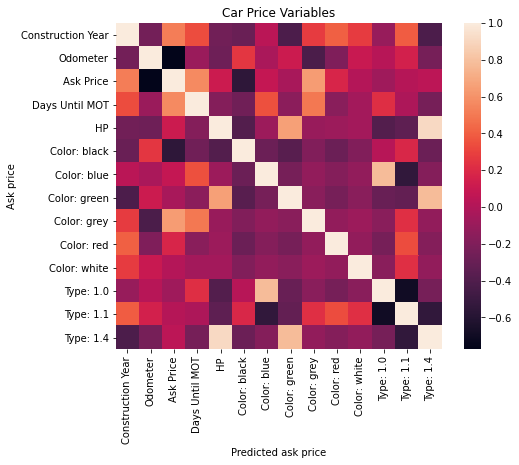

[1199.  1199.   600.   874.5]


In [ ]:
import pandas as pd    
import matplotlib    
import matplotlib.pyplot as plt    
import numpy as np    
import seaborn as sns    

#读取数据    
df = pd.read_csv('data.csv')    
print(df)    # data frame    

# 特征处理    
# 把颜色独热编码    
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')    
# 把类型独热编码    
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')    

# 添加独热编码数据列    
df = pd.concat([df, df_colors, df_type], axis=1)    
# 去除独热编码对应的原始列    
df = df.drop(['Brand', 'Type', 'Color'], axis=1)    

print(df)    

# 数据转换    
matrix = df.corr()    
f, ax = plt.subplots(figsize=(8, 6))    
sns.heatmap(matrix, square=True)    
plt.title('Car Price Variables')    

# 忽略警告信息    
import warnings    
warnings.filterwarnings("ignore")    

from sklearn.neighbors import KNeighborsRegressor    
from sklearn.model_selection import train_test_split    
from sklearn import preprocessing    
from sklearn.preprocessing import StandardScaler    
import numpy as np    

# 先将标签取出    
y = df['Ask Price'].values.reshape(-1, 1)    

# 删除标签列作为特征数据    
X = df.drop(['Ask Price'], axis=1)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)       
X_normalizer = StandardScaler() # N(0,1)    

# 将需要归一化处理的三个列值替换为处理后的    
X_train.loc[:,['Construction Year', 'Days Until MOT', 'Odometer']] = X_normalizer.fit_transform(X_train[['Construction Year', 'Days Until MOT', 'Odometer']])    
X_test.loc[:,['Construction Year', 'Days Until MOT', 'Odometer']] = X_normalizer.transform(X_test[['Construction Year', 'Days Until MOT', 'Odometer']])    

y_normalizer = StandardScaler()    
y_train = y_normalizer.fit_transform(y_train)    
y_test = y_normalizer.transform(y_test)    

knn = KNeighborsRegressor(n_neighbors=2)    
knn.fit(X_train, y_train.ravel())    

#Now we can predict prices:    
y_pred = knn.predict(X_test)    
y_pred_inv = y_normalizer.inverse_transform(y_pred)    
y_test_inv = y_normalizer.inverse_transform(y_test)    

# Build a plot    
plt.scatter(y_pred_inv, y_test_inv)    
plt.xlabel('Prediction')    
plt.ylabel('Real value')    

# Now add the perfect prediction line    
diagonal = np.linspace(500, 1500, 100)    
plt.plot(diagonal, diagonal, '-r')    
plt.xlabel('Predicted ask price')    
plt.ylabel('Ask price')    
plt.show()    

print(y_pred_inv)    
